In [1]:
#!pip install pandas matplotlib seaborn scikit-learn
#conda install ipykernel

In [2]:
import pandas as pd
print("Notebook is working! 🎉")

Notebook is working! 🎉


## 1. Project Overview
- Predict customer churn for a fictional telco
- Binary classification problem (churned vs. retained)

## 2. Load & Preview Data

In [3]:
# Load the CSV
df = pd.read_csv("../data/Telco Customer Churn.csv")

# Quick preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Quick info
df.info()
df.isnull().sum().sort_values(ascending=False)

# Conclusion: no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

In [6]:
# Quick describe
df.describe(include='all')

# Conclusion: customerID appears to be a unique identifier. Most features are categorical, with only MonthlyCharges and tenure standing out as continuous numerical variables. This gives us a clearer view of which columns may require encoding or scaling later.
# Update: TotalCharges is also a numerical variable just need to cleanse the blanks

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 3. Data Cleaning & Preprocessing

### 🔧 Handling `TotalCharges` Missing Values
We found that some rows have blank `TotalCharges` where `tenure == 0`. These likely represent new customers who haven’t been billed yet. We replaced blanks with 0s in these rows and converted `TotalCharges` to numeric.

In [8]:
# Display rows where 'TotalCharges' is not a valid number and inspect their 'tenure'
df[~df['TotalCharges'].str.replace('.', '', 1).str.isdigit()]["tenure"]

# Replace blank values in 'TotalCharges' with 0, then convert the column to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

# ✅ Verify the changes
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

## 4. Exploratory Data Analysis (EDA)

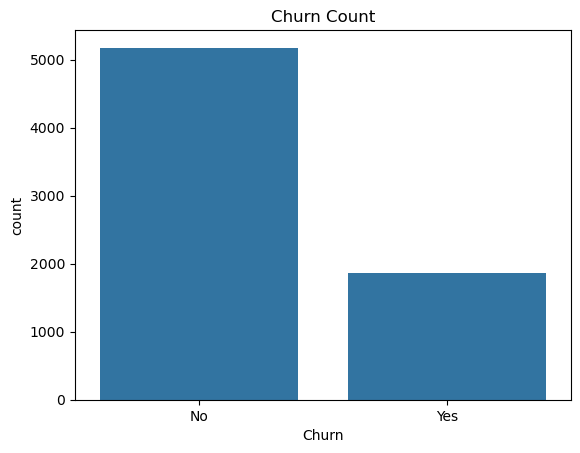

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='Churn')
plt.title('Churn Count')
#plt.savefig(f'../outputs/visuals/churn_imbalance.png')
plt.show()



### 📌 Conclusion

**Target Imbalance:** The distribution of the Churn variable is imbalanced, with significantly more customers not churning (roughly 5:2 ratio). 
This suggests the need for careful consideration during model training to handle potential class imbalance
(e.g., using techniques like oversampling, undersampling, or using appropriate evaluation metrics like precision, recall, or F1-score).

### 🔎 Looking for Churn Patterns in Categorical Variables

In [10]:
#lets have a look at the imbalance over the different categories we have

def plot_categorical_with_percentages(data, column):
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=data, x=column, hue='Churn')
    
    # Get the labels of the categories
    category_labels = data[column].unique()
    
    # Loop through each category and add percentage annotations
    for p in ax.patches:
        
        height = p.get_height()

        if height == 0:
            continue
        # print(p)
        # Get the x position of the patch and convert it to the corresponding category
        category_position = int(p.get_x() + p.get_width())
    
        category_label = category_labels[category_position]
        
        # Filter data to get the total number of records for this category
        total_in_category = len(data[data[column] == category_label])
        
        # Calculate the percentage of churn in this category
        percentage = f'{100 * height / total_in_category:.1f}%'
        
        # Annotate the bar with the percentage
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 4),
                    textcoords='offset points')

    plt.title(f'Churn by {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig(f'../outputs/visuals/churn_by_{column}.png')
    plt.show()

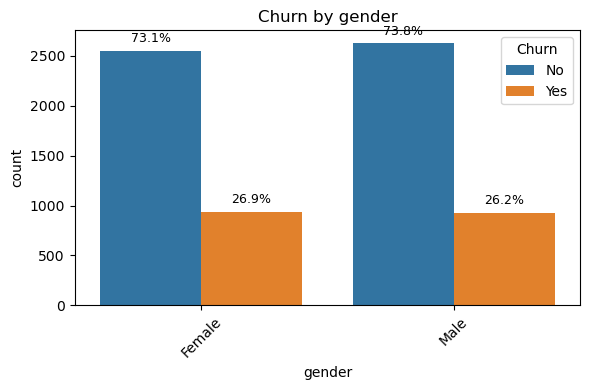

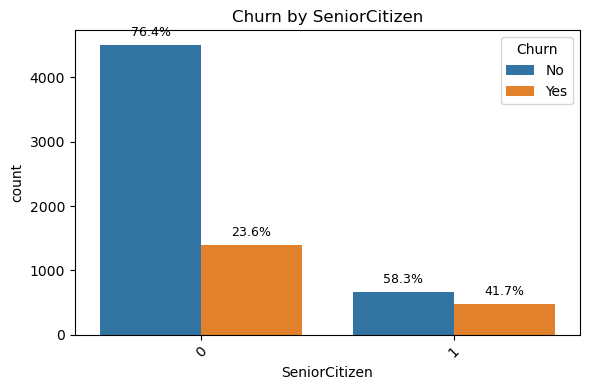

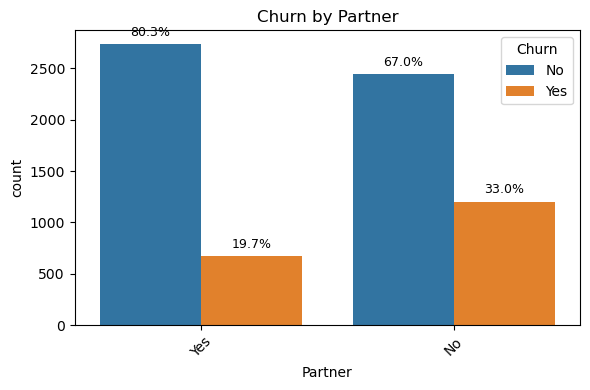

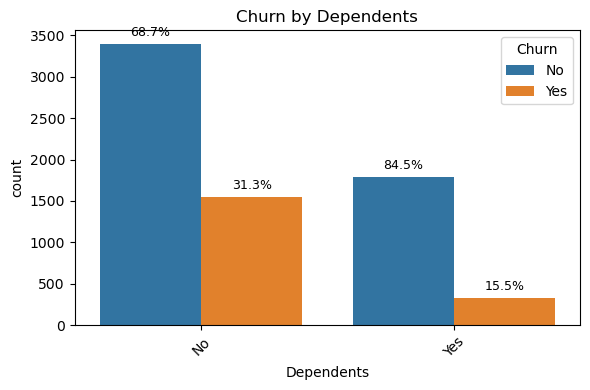

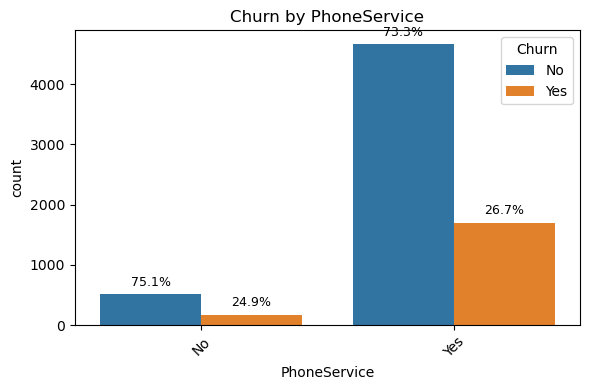

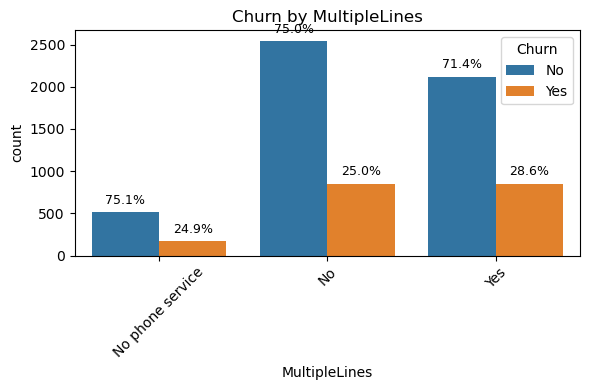

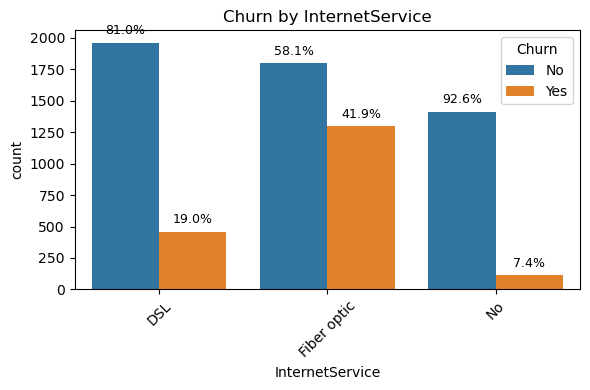

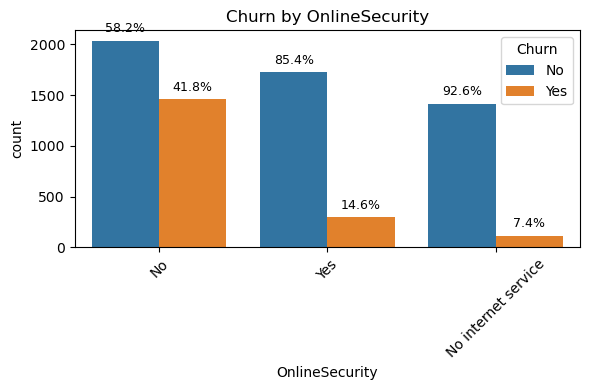

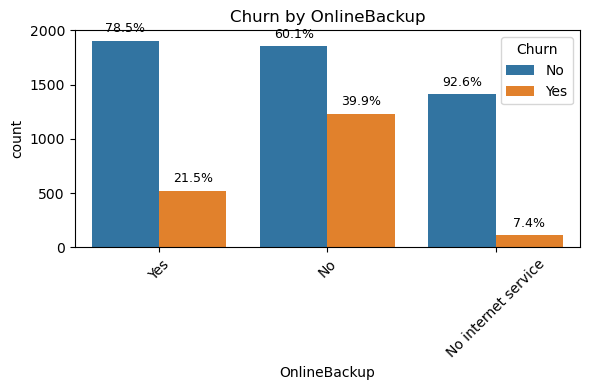

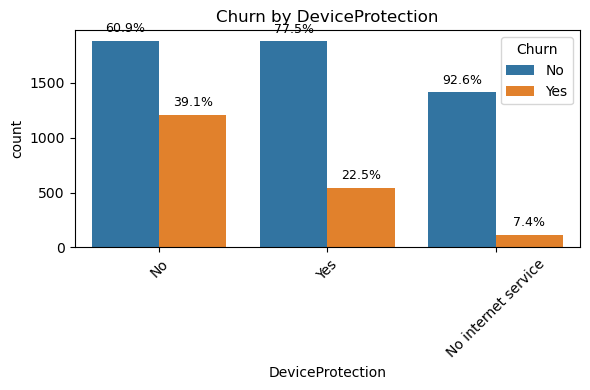

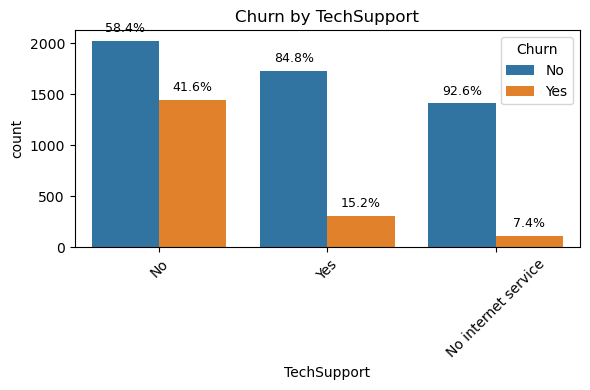

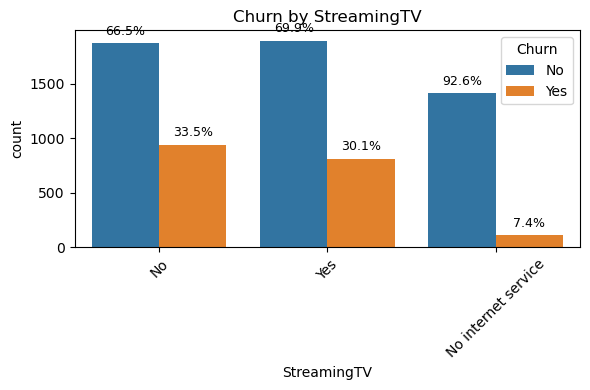

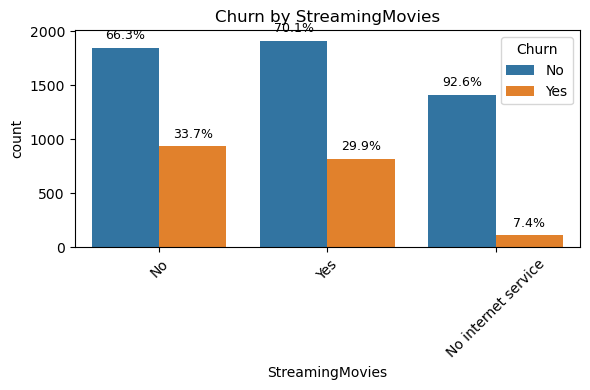

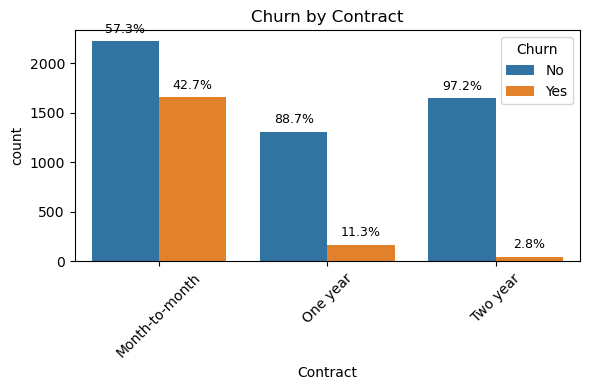

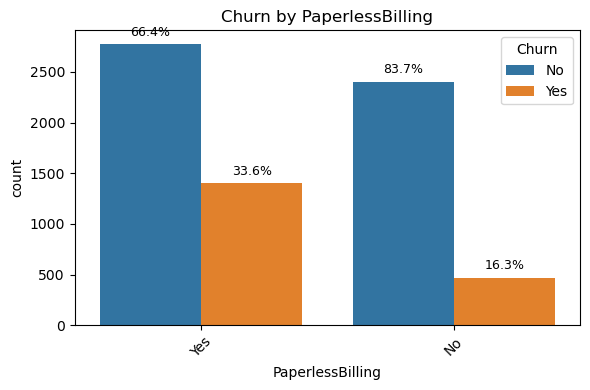

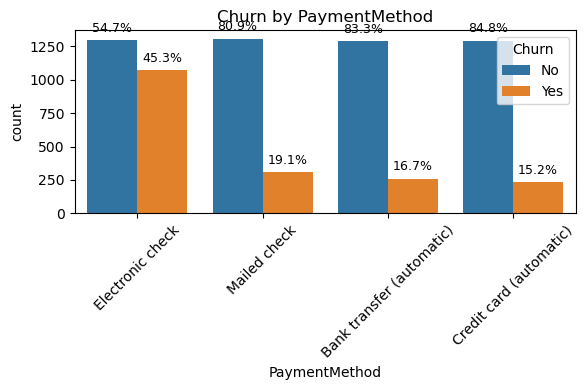

In [11]:
#lets have a look at the imbalance over the different categories we have

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plot_categorical_with_percentages(df, col)

### 📌 Churn Patterns Observed in Categorical Variables

- **Payment Method & Billing**  
  Customers using the *Electronic Check* method exhibit a significantly higher churn rate (45%) compared to other payment methods (15–19%). Similarly, customers with *Paperless Billing* have a churn rate of 33.6%, which is more than double that of customers receiving paper bills (16.3%). In both cases, the sample sizes are comparable, indicating that these trends are not driven by volume.

- **Contract Type**  
  Churn rates strongly correlate with contract length. Customers on a *month-to-month* plan churn at a rate of 42.7%, compared to 11.3% for *one-year* contracts and just 2.8% for *two-year* contracts. While the volume of customers differs across these categories, none of them are too small to be considered insignificant.

- **Streaming Services**  
  *Streaming TV* and *Streaming Movies* do not show meaningful differences in churn, with approximately 30% churn regardless of service subscription. However, customers with *No Internet Service* show a much lower churn rate (7.4%), suggesting a potentially distinct customer segment.

- **Value-Added Services**  
  The presence of services like *Tech Support*, *Device Protection*, *Online Backup*, and *Online Security* is consistently associated with lower churn. Customers without these services churn at rates near 40%, while those with them churn closer to 20%. Similarly, *Internet Service Type* shows a pattern: customers with *DSL* churn less than those with *Fiber Optic*, and those with *No Internet Service* churn the least.

- **Demographics**  
  *Gender*, *Phone Service*, and *Multiple Lines* do not appear to significantly affect churn. In contrast, having a *Partner* or *Dependents* is associated with reduced churn. *Senior Citizens* have a noticeably higher churn rate, although they represent a smaller portion of the dataset.

### 🔎 Looking for Churn Patterns in Numerical Variables

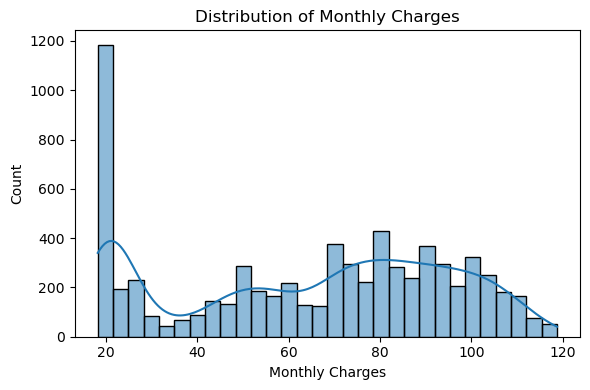

In [12]:
#Lets have a view at the numerical variables

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/monthly_charge_histogram.png')
plt.show()

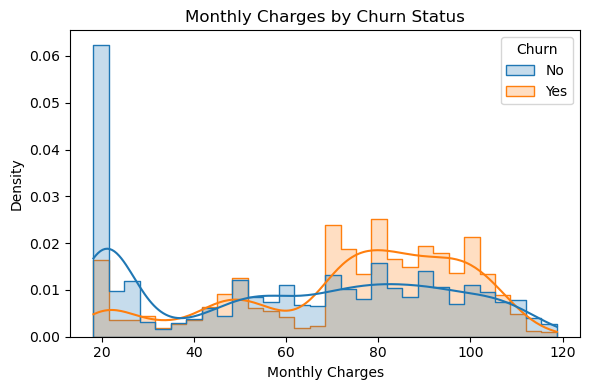

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, element='step', stat='density', common_norm=False)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_monthly_charges_histogram.png')
plt.show()

In [14]:
len(df[(df['MonthlyCharges'] > 68.5) & (df['Churn'] == 'Yes')])/len(df[df['Churn'] == "Yes"])

0.7164258962011771

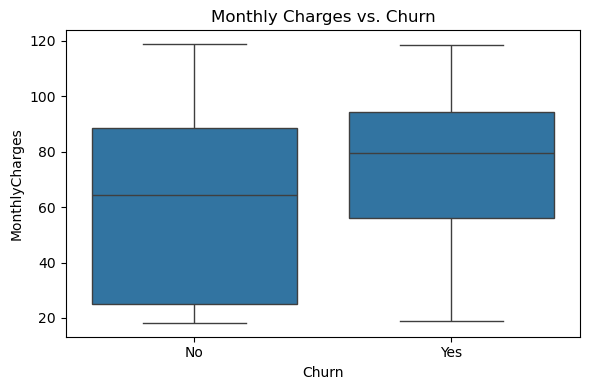

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs. Churn')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_monthly_charges_boxplot.png')
plt.show()

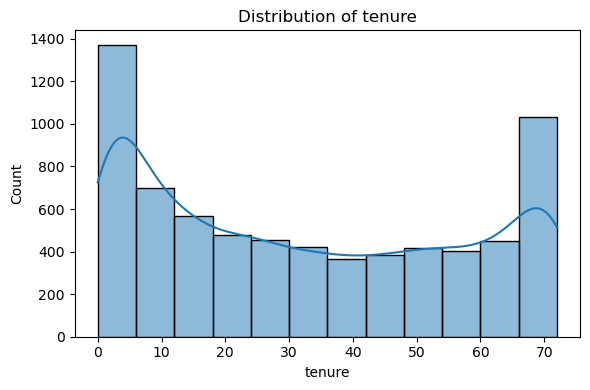

In [16]:
#Lets have a view at the numerical variables

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', bins=12, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/tenure_histogram.png')
plt.show()

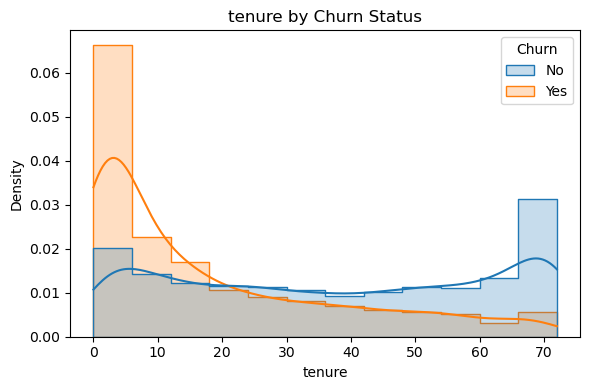

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=12, kde=True, element='step', stat='density', common_norm=False)
plt.title('tenure by Churn Status')
plt.xlabel('tenure')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_tenure_histogram.png')
plt.show()

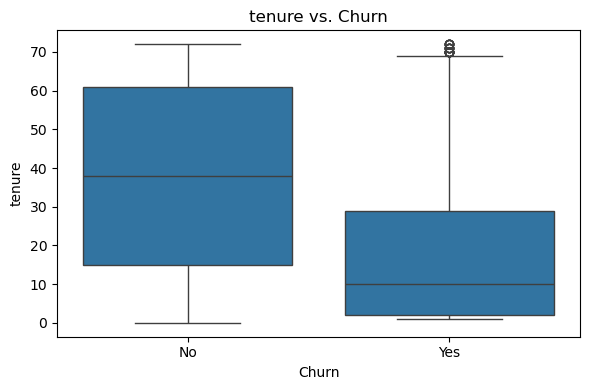

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('tenure vs. Churn')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_tenure_boxplot.png')
plt.show()

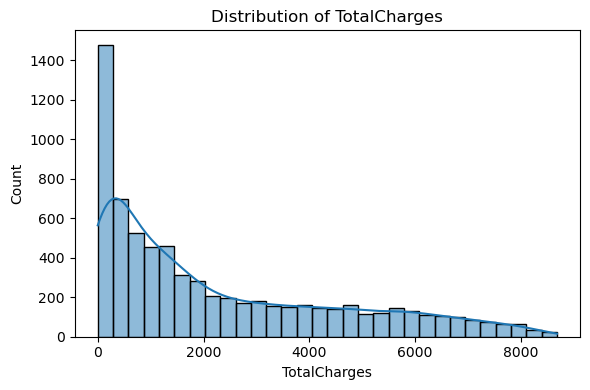

In [19]:
#Lets have a view at the numerical variables

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True)
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/TotalCharges_histogram.png')
plt.show()

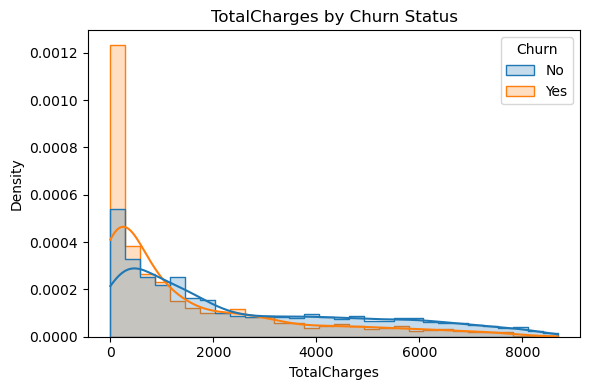

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, kde=True, element='step', stat='density', common_norm=False)
plt.title('TotalCharges by Churn Status')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_TotalCharges_histogram.png')
plt.show()

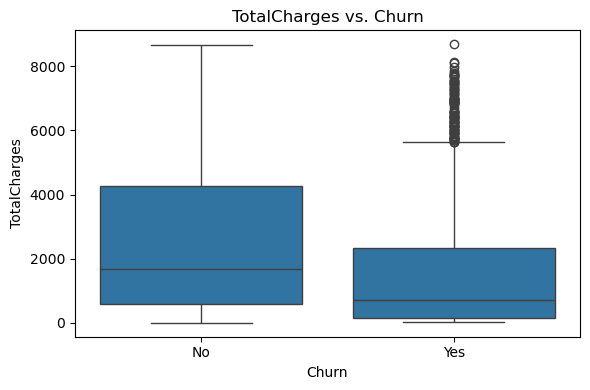

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('TotalCharges vs. Churn')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_by_TotalCharges_boxplot.png')
plt.show()

### 📌 Churn Patterns Observed in Categorical Variables

#### **Monthly Charges**

- From the `monthly_charge_histogram.png`, we observe a large concentration of customers (approximately 1,200 or 17% of the base) in the lowest price bucket (between \$18.25 and \$21.60). These may represent newly onboarded or basic plan users.
  
- Excluding this initial spike, the distribution of Monthly Charges appears roughly normal (Gaussian).

- The `churn_by_monthly_charges_histogram.png` reveals a strong correlation between higher Monthly Charges and increased churn. Churn rate notably rises in the \$68–\$105 range, where approximately **72% of total churn** occurs. This suggests that customers in this price band might be more price-sensitive or are facing competitive alternatives.

- This trend is further confirmed by the `churn_by_monthly_charges_boxplot.png`, which shows that customers who churn tend to have **significantly higher median Monthly Charges** compared to those who stay.


#### **Tenure**

- From the `tenure_histogram.png`, we observe two notable spikes: one at the beginning (representing new customers) and another at the 72-month mark, where the data caps, clustering all customers with tenure over 6 years.

- Outside of these two spikes, a significant drop-off occurs in the first 18 months. Approximately **65% of customer churn** happens within this window, with **50% leaving within the first 6 months**. Beyond this period, the distribution stabilizes, with around 500 customers per bucket up to the 6-year mark.

- These patterns suggest a substantial churn risk during the early lifecycle, potentially due to poor onboarding or unmet expectations.

- Supporting visualizations further confirm that **long-tenured customers are significantly less likely to churn**, highlighting a critical **cutoff point around 1.5 years**. This insight suggests a strategic opportunity to implement **retention initiatives** focused on the early stages of the customer journey, particularly within the first 18 months.

#### **Total Charges**

- From the right-skewed distribution in `TotalCharges_histogram.png` and `churn_by_TotalCharges_histogram.png`, we observe a large number of new or early-stage customers with low total charges. This reinforces earlier observations around high early churn and highlights the importance of potential retention initiatives to convert more of these customers into long-term subscribers.

#### **Outlier Analysis**
- While a few outliers are present in numerical features such as TotalCharges, and tenure, they appear to be legitimate customer records rather than data entry errors.

- These extreme values likely represent real-world scenarios (e.g., long-term loyal customers).

- Conclusion: Outliers are retained in the dataset as they may carry meaningful business insights and do not appear to distort the overall analysis.

### 🔎 Looking for Correlation between numberical variables and perforing Multivariate Analysis for tenure and MonthlyCharges

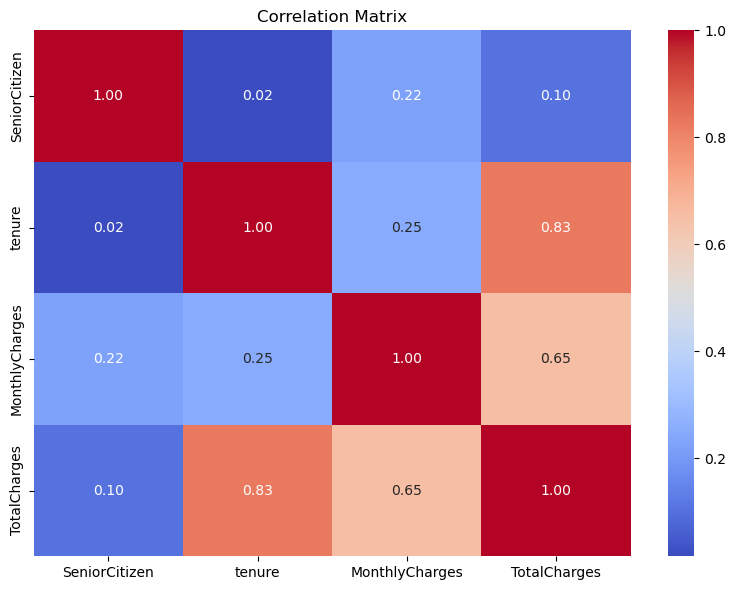

In [22]:
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_correlation_matrix.png')
plt.show()

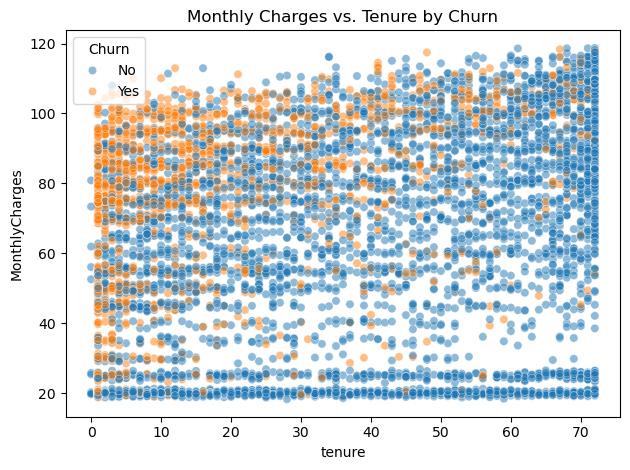

In [23]:
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.5)
plt.title('Monthly Charges vs. Tenure by Churn')
plt.tight_layout()
plt.savefig(f'../outputs/visuals/churn_multivariate_analysis.png')
plt.show()

### 📌 Conclusion: Correlation Matrix & Multivariate Analysis
- There are no strong or surprising correlations in the dataset. As expected, TotalCharges is highly correlated with both tenure and MonthlyCharges, since it is essentially derived from these two variables. Interestingly, the slightly stronger correlation with tenure may suggest that customers often change service plans, which can affect the monthly cost over time.

- The weak correlation between MonthlyCharges and tenure indicates that low monthly charges do not necessarily lead to long-term customer retention. This suggests that price alone may not be a sufficient driver of customer satisfaction or loyalty.

- The multivariate scatter plot reveals a cluster of customers with low tenure and high monthly charges who are more likely to churn. However, due to the high density and overlap of points, further feature engineering or data aggregation may be required to clearly isolate and interpret patterns.

## 5. Feature Engineering

## 6. Model Training

## 7. Model Evaluation

## 8. Insights & Next Steps